# Multi Qubit Quantum Gates

This is the second coding lecture in the course "Quantum Computing with Qiskit Ultimate Masterclass" on Udemy by Srinjoy Ganguly (Section 17). The course was last updated May 2022. qiskit has been updated since and the script shared by the author is not working anymore. This is a version running May 2024 (see qiskit version below). The script has been streamlined to avoid duplications.

Learning goal: Learn Multi Qubit Quantum Gates

## Importing necessary libraries

In [65]:
import qiskit
import numpy as np
from qiskit_aer import Aer
from qiskit.providers.basic_provider import BasicProvider
from qiskit import  QuantumCircuit, transpile, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_state_city # Density Matrix Plot
from qiskit.visualization import plot_state_qsphere # Used for Multi Qubit Visualization
from qiskit.visualization import plot_bloch_multivector # Plotting the Bloch Sphere for Single Qubits
from qiskit.visualization import plot_histogram # 2D Histogram
from math import pi, sqrt # pi = 3.14 and square root operation
from qiskit.quantum_info import Operator 
from qiskit.visualization.array import array_to_latex # format matrices so that one can read them
from IPython.display import display, Math, Latex

#### Basic Qiskit Information

- **All qubits in Qiskit starts from the state |0> by default**
- **Qiskit uses little endian ordering system for both classical bit and quantum bit ordering. This means that for 3 qubits $q_0$, $q_1$ & $q_2$, the qiskit ordering is reversed as $q_2$, $q_1$ & $q_0$. Same is for classical bits as well.**

## Quantum CNOT/CX Gate

Controlled NOT gate. 1st qubit is controlled, 2nd qubit is target (or vice versa). This means that the value of second depends on the first. Gate used to create entanglement.

Truth table:

|Input --> Output|

1st|2nd| --> 1st|2nd

|00>   --> |00> nothing happens, while first qubit 0
|01> --> |01>
|10> --> |11> first qubit is 1, second qubit is submitted to NOT
|11> --> |10>

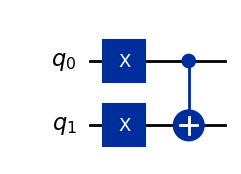

In [66]:
# CX-gate on |11> = |10> (|01> according to Qiskit ordering)
qc_cx = QuantumCircuit(2,name="qc")
qc_cx.x(0) # X Gate on 1st Qubit
qc_cx.x(1) # X Gate on 2nd Qubit
qc_cx.cx(0,1) # CX Gate with 1st Qubit as Control and 2nd Qubit as Target
qc_cx.draw('mpl')

### Density Matrix Plot for CNOT Gate

In [67]:
# function to run a quantum simulation
def run_simulation(qc):
    simulator_state = Aer.get_backend('statevector_simulator')
    # Execute the circuit
    job = transpile(qc, simulator_state)
    qc_output = simulator_state.run(job) # runs the quantum circuit

    result = qc_output.result().get_statevector(qc, decimals=3) # get result from the circuit
    return(result)

In [68]:
psi  = run_simulation(qc_cx)
print("\nQuantum state is:",psi)


Quantum state is: Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


In [69]:
psi  = run_simulation(qc_cx)
print("\nQuantum state is:")
display(array_to_latex(psi))


Quantum state is:


<IPython.core.display.Latex object>

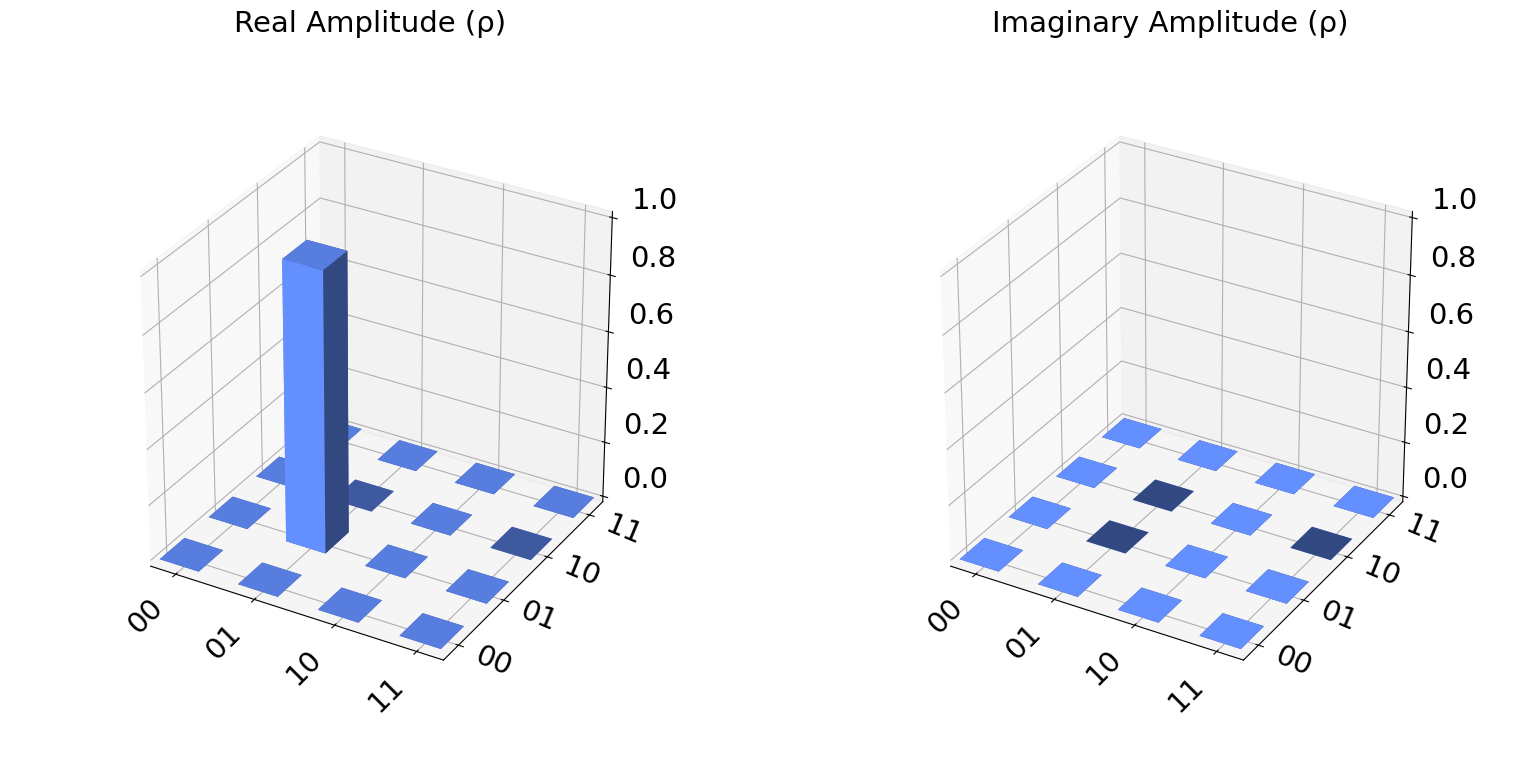

In [70]:
# Plot a Density Matrix Plot
plot_state_city(psi)

### QSphere Plot for CX Gate

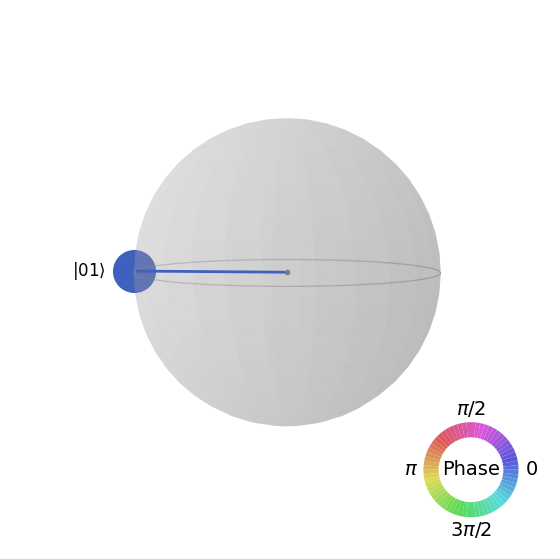

In [71]:
# Plot the QSphere
plot_state_qsphere(psi)

### Unitary Operator for CNOT Gate

2-qubit gate, i.e. 2^n x 2^n. With n=2 --> 4x4 matrix

To form the matrix, look at the truth table above and place "1" in the CX matrix, where, for a given input, its output is:

CX-Matrix:

       Input: 00 01 10 11

Output:

00 | 1 0 0 0 

01 | 0 1 0 0 

10 | 0 0 0 1

11 | 0 0 1 0

Alternative (**read in edit-mode!**): ket-bra: |00><00| + |01><01| + |10><11| + |11><10| =

[1][1000] + [0][0100] + [0][0001] + [0][0010] =
[0]         [1]         [0]         [0]
[0]         [0]         [1]         [0]
[0]         [0]         [0]         [1]

result is equal to matrix above


In [72]:
# function to show the unitary operator of the quantum circuit
def show_unitary_operator(qc):
    # Set the Aer simulator as Unitary for Unitary Operator
    backend = Aer.get_backend('unitary_simulator')

    # Execute the circuit
    x_unitary = transpile(qc, backend)
    job = backend.run(x_unitary)
    print("This is the unitary operator for the gate:") 
    circuit = job.result().get_unitary(qc, decimals=3)
    display(array_to_latex(Operator(circuit)))

In [73]:
show_unitary_operator(qc_cx)

This is the unitary operator for the gate:


<IPython.core.display.Latex object>

### Running CNOT Gate Circuit using QASM Simulator

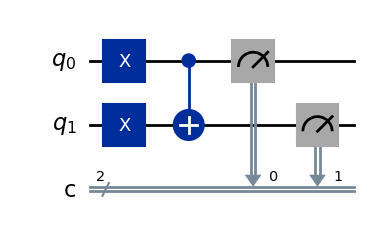

In [74]:
# CNOT with Measurement
qc_cx = QuantumCircuit(2,2,name="qc")
qc_cx.x(0) # X Gate on 1st Qubit
qc_cx.x(1) # X Gate on 2nd Qubit
qc_cx.cx(0,1) # CX Gate with 1st Qubit as Control and 2nd Qubit as Target
qc_cx.measure([0,1],[0,1])
qc_cx.draw('mpl')

In [112]:
# function to run a quantum simulation
def run_measurement(qc, do_transpile = False):
    # Use Aer's qasm_simulator
    backend = Aer.get_backend('qasm_simulator')
    
    # some gates are not available in qasm_simulator. For these, you need to transpile
    if do_transpile:
        qc = transpile(qc, backend=backend)
    # Execute the circuit 1000 times on the qasm simulator
    result = backend.run(qc, shots=1000).result()

    # Returns counts
    counts = result.get_counts(qc)
    print("\nTotal counts are:",counts)
    return counts


Total counts are: {'01': 1000}


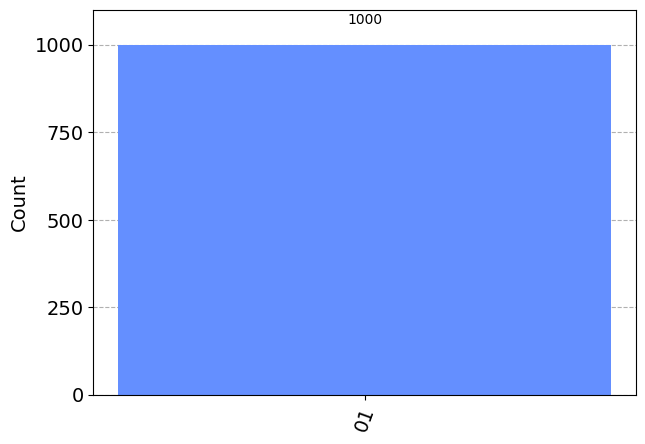

In [76]:
counts = run_measurement(qc_cx)
# Plot a histogram
plot_histogram(counts)

## CNOT Gate using CZ and H Gates

Z gate applies a negative, only when the state is "1"

Truth table:

|Input --> Output|

1st|2nd| --> 1st|2nd

|00>   --> |00> nothing happens, while first qubit 0
|01> --> |01>
|10> --> |10> first qubit is 1, but Z-gate does not act on 0
|11> --> -|11> first qubit is 1, Z-gate returns negative

CX-Matrix:

       Input: 00 01 10 11

Output:

00 | 1 0 0 0 

01 | 0 1 0 0 

10 | 0 0 1 0

11 | 0 0 0 -1

the "-1" can be used as marking, very useful for the Grover algorithm

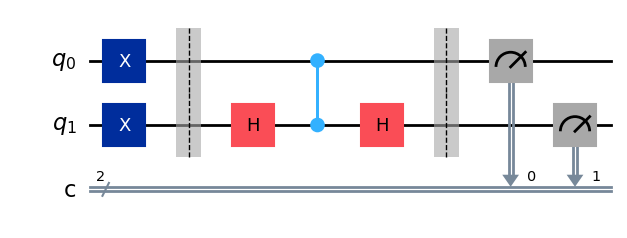

In [77]:
# CNOT with Measurement
qc_cx = QuantumCircuit(2,2,name="qc")
qc_cx.x(0) # X Gate on 1st Qubit
qc_cx.x(1) # X Gate on 2nd Qubit
qc_cx.barrier()
# CNOT gate
qc_cx.h(1) # H Gate on 2nd Qubit
qc_cx.cz(0,1) # CZ Gate
qc_cx.h(1) # H Gate on 2nd Qubit
# End of CNOT gate
qc_cx.barrier()
qc_cx.measure([0,1],[0,1])
qc_cx.draw('mpl')


Total counts are: {'01': 1000}


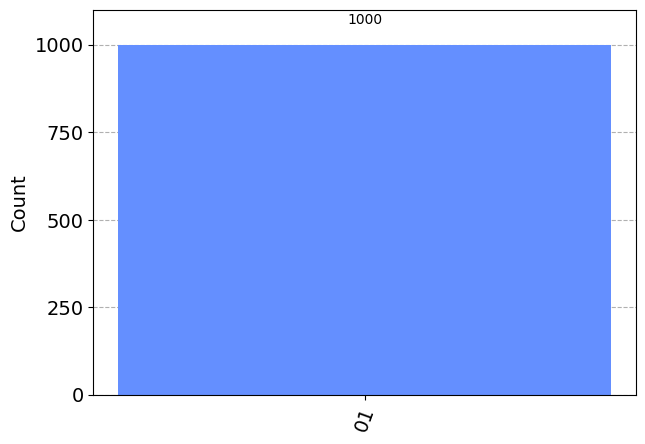

In [78]:
counts = run_measurement(qc_cx)
# Plot a histogram
plot_histogram(counts)

## Quantum CZ Gate

Z gate applies a negative, only when the state is "1"

Truth table:

|Input --> Output|

1st|2nd| --> 1st|2nd

|00>   --> |00> nothing happens, while first qubit 0
|01> --> |01>
|10> --> |10> first qubit is 1, but Z-gate does not act on 0
|11> --> -|11> first qubit is 1, Z-gate returns negative

CX-Matrix:

       Input: 00 01 10 11

Output:

00 | 1 0 0 0 

01 | 0 1 0 0 

10 | 0 0 1 0

11 | 0 0 0 -1

the "-1" can be used as marking, very useful for the Grover algorithm

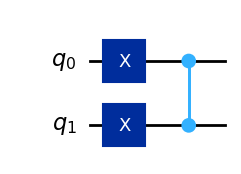

In [79]:
# CZ-gate on |11> = -|11> (|11> according to Qiskit ordering)
qc_cz = QuantumCircuit(2,name="qc")
qc_cz.x(0) # X Gate on 1st Qubit
qc_cz.x(1) # X Gate on 2nd Qubit
qc_cz.cz(0,1) # CZ Gate with 1st Qubit as Control and 2nd Qubit as Target
qc_cz.draw('mpl')

### Density Matrix Plot for CZ Gate

In [80]:
psi_cz  = run_simulation(qc_cz)
print("\nQuantum state is:")
display(array_to_latex(psi_cz))


Quantum state is:


<IPython.core.display.Latex object>

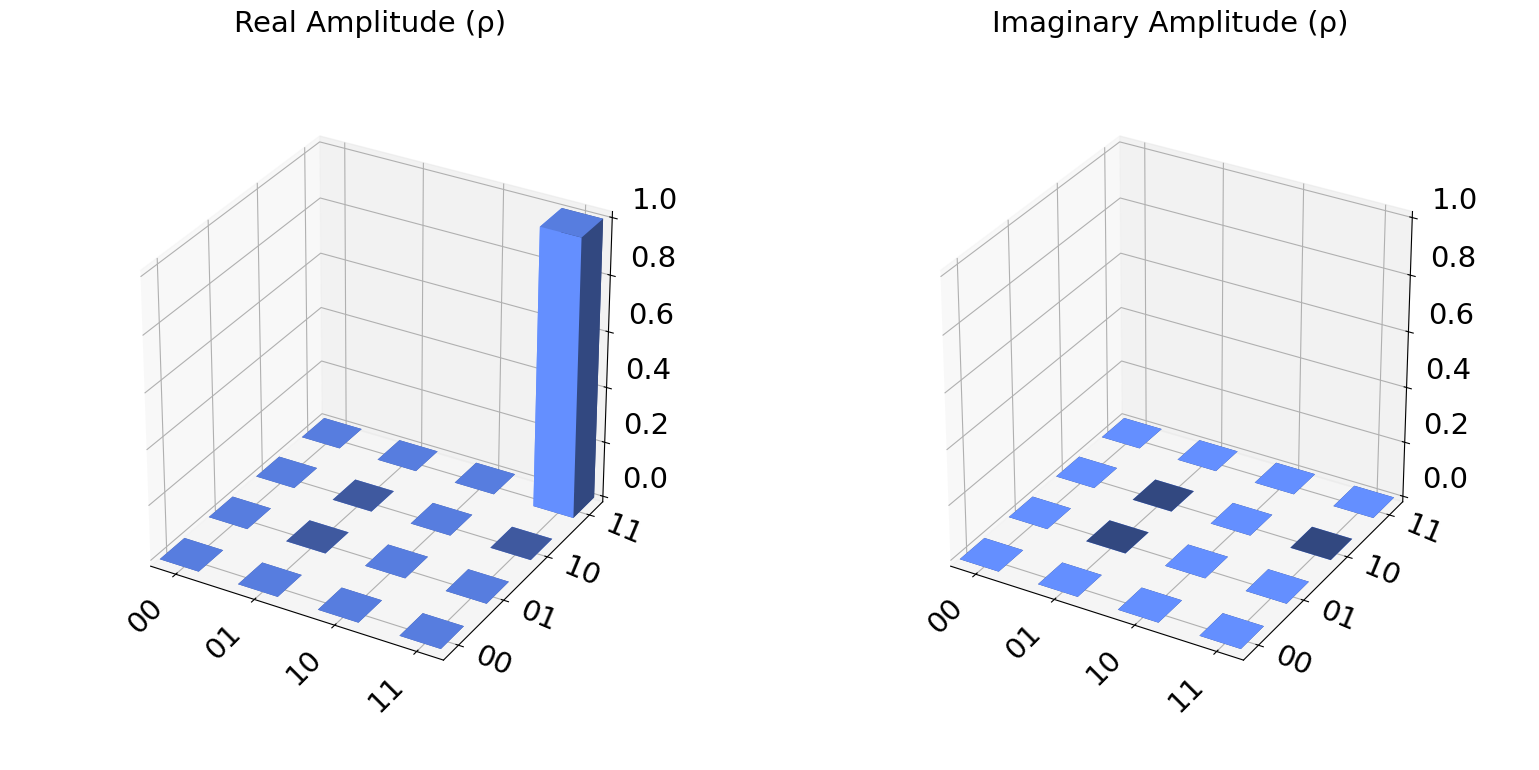

In [81]:
# Plot a Density Matrix Plot
plot_state_city(psi_cz)

### QSphere Plot for CZ Gate

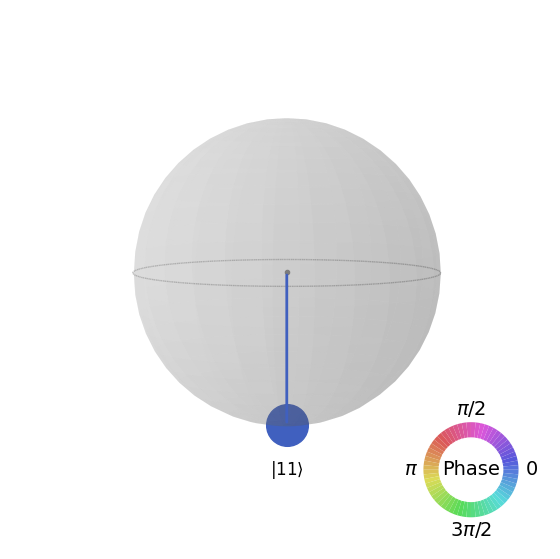

In [82]:
# Plot the QSphere
plot_state_qsphere(psi_cz)

### Unitary Operator for CZ Gate

In [83]:
show_unitary_operator(qc_cz)

This is the unitary operator for the gate:


<IPython.core.display.Latex object>

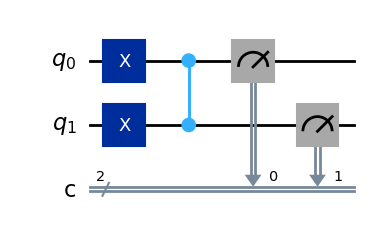

In [84]:
# CZ-gate with measurement
qc_cz = QuantumCircuit(2,2,name="qc")
qc_cz.x(0) # X Gate on 1st Qubit
qc_cz.x(1) # X Gate on 2nd Qubit
qc_cz.cz(0,1) # CZ Gate with 1st Qubit as Control and 2nd Qubit as Target
qc_cz.measure([0,1],[0,1])
qc_cz.draw('mpl')

### Running CZ Gate Circuit using QASM Simulator


Total counts are: {'11': 1000}


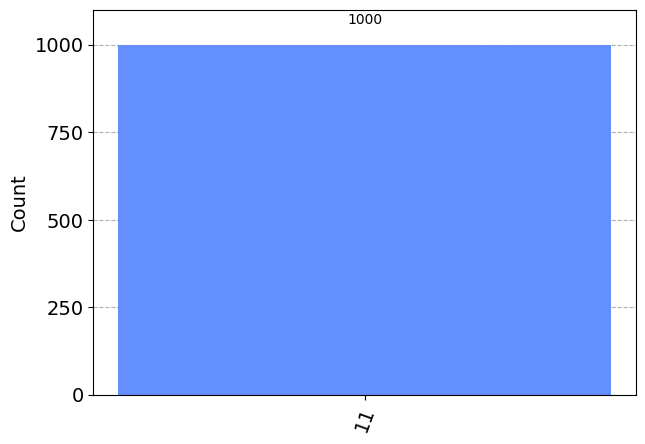

In [85]:
counts = run_measurement(qc_cz)
# Plot a histogram
plot_histogram(counts)

## CZ Gate using CNOT and H Gates

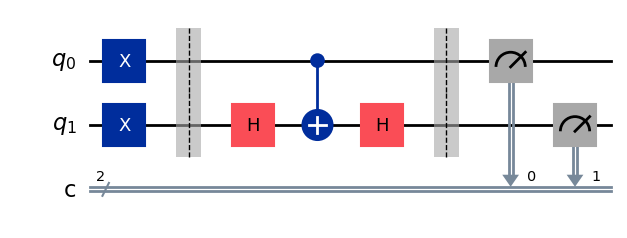

In [86]:
# CZ-gate with measurement
qc_cz = QuantumCircuit(2,2,name="qc")
qc_cz.x(0) # X Gate on 1st Qubit
qc_cz.x(1) # X Gate on 2nd Qubit
qc_cz.barrier()
# Equivalent to Control Z gate
qc_cz.h(1) # H Gate on 2nd Qubit
qc_cz.cx(0,1) # CNOT Gate
qc_cz.h(1) # H Gate on 2nd Qubit
# end of equivalence
qc_cz.barrier()
qc_cz.measure([0,1],[0,1])
qc_cz.draw('mpl')


Total counts are: {'11': 1000}


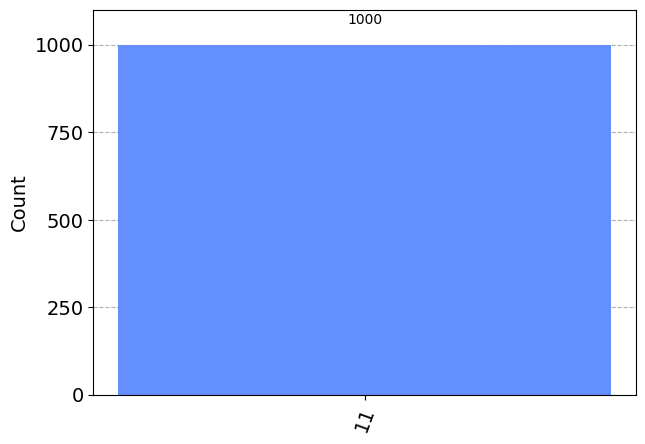

In [87]:
counts = run_measurement(qc_cz)
# Plot a histogram
plot_histogram(counts)

## Quantum CH Gate

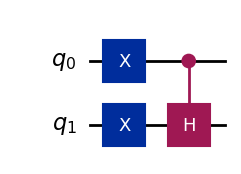

In [88]:
# CH-gate on |11> 
qc_ch = QuantumCircuit(2,name="qc")
qc_ch.x(0) # X Gate on 1st Qubit --> qubit is "1"
qc_ch.x(1) # X Gate on 2nd Qubit --> qubit is "1"
qc_ch.ch(0,1) # CH Gate with 1st Qubit as Control and 2nd Qubit as Target
qc_ch.draw('mpl')

### Density Plot for CH Gate


Quantum state is:


<IPython.core.display.Latex object>

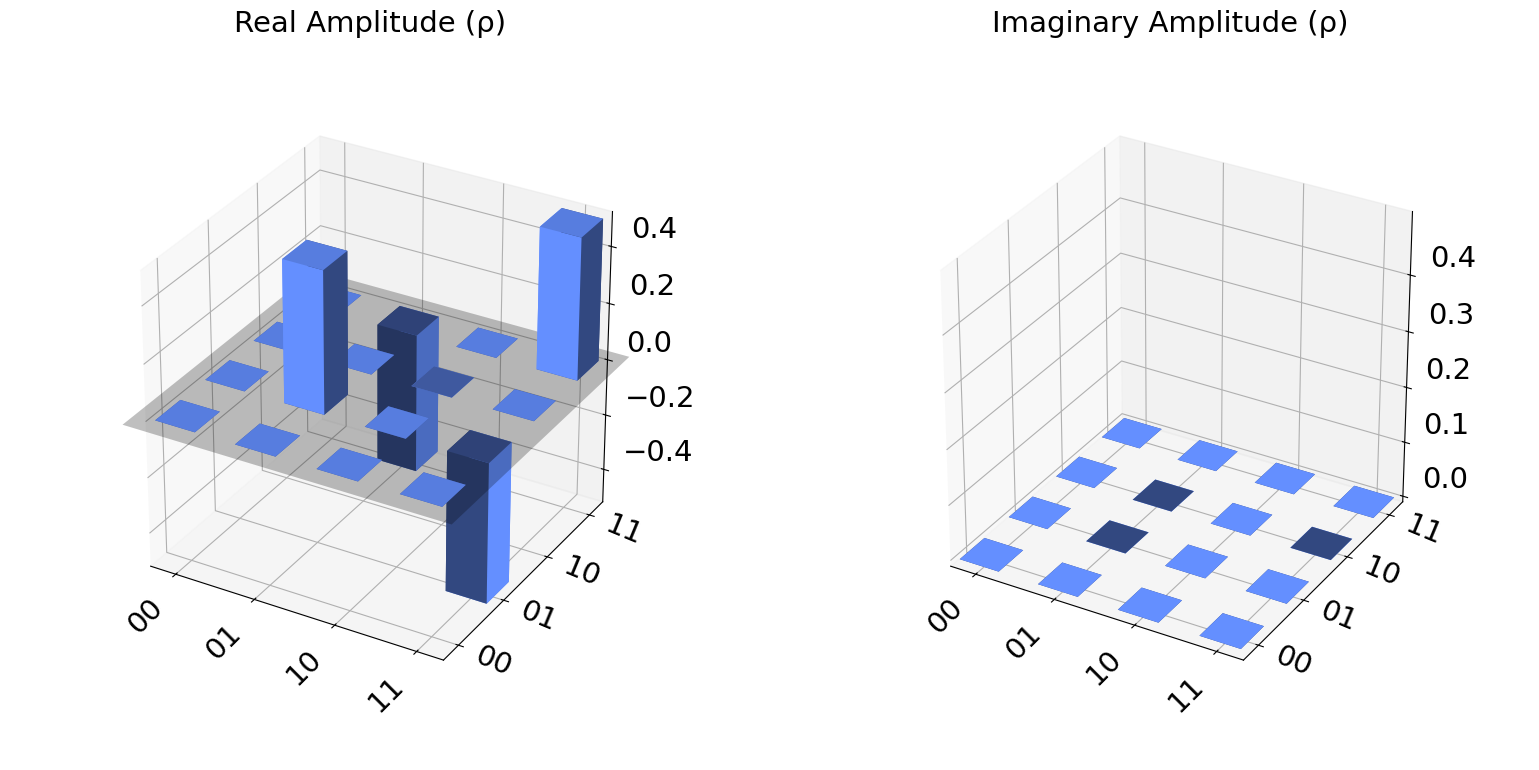

In [89]:
psi_ch  = run_simulation(qc_ch)
print("\nQuantum state is:")
display(array_to_latex(psi_ch))
# Plot a Density Matrix Plot
plot_state_city(psi_ch)

### QSphere Plot for CH Gate

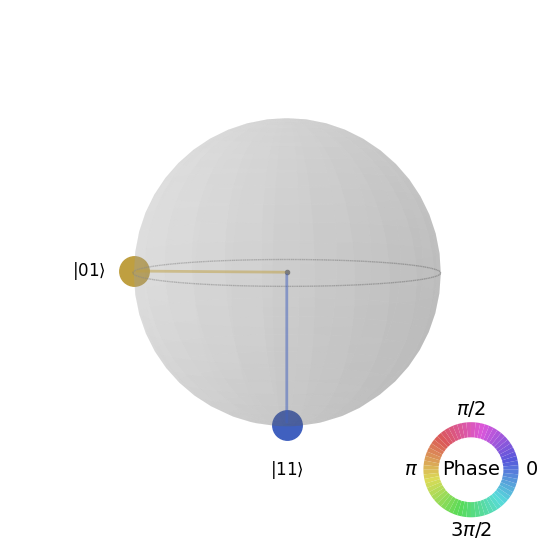

In [90]:
# Plot the QSphere
plot_state_qsphere(psi_ch)

### Unitary Operator for CH Gate

In [91]:
show_unitary_operator(qc_ch)

This is the unitary operator for the gate:


<IPython.core.display.Latex object>

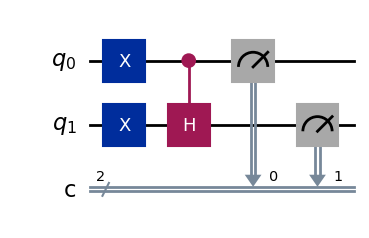

In [108]:
# CH-gate on |11> 
qc_ch = QuantumCircuit(2,2,name="qc")
qc_ch.x(0) # X Gate on 1st Qubit
qc_ch.x(1) # X Gate on 2nd Qubit
qc_ch.ch(0,1) # CH Gate with 1st Qubit as Control and 2nd Qubit as Target
qc_ch.measure([0,1],[0,1])
qc_ch.draw('mpl')

### Running CH Gate Circuit using QASM Simulator


Total counts are: {'11': 500, '01': 500}


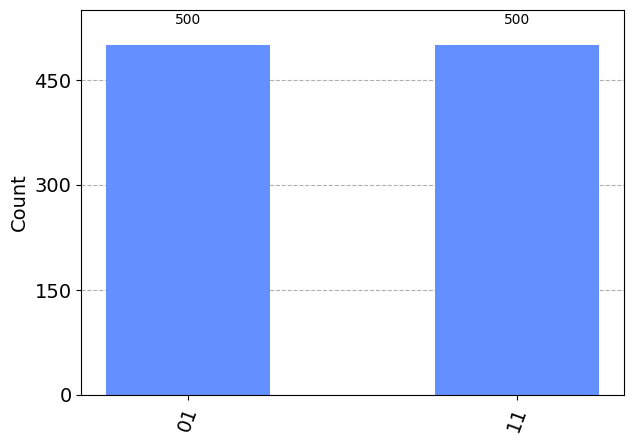

In [113]:
counts = run_measurement(qc_ch, do_transpile = True)
# Plot a histogram
plot_histogram(counts)

## CH Gate using CNOT & Ry Gates

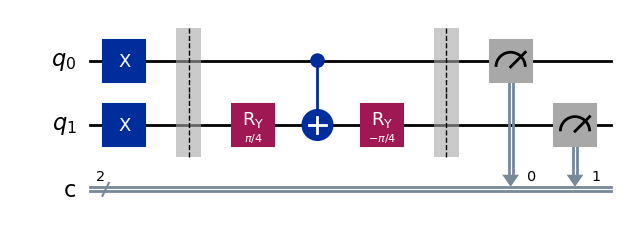

In [114]:
# CH-gate on |11> 
qc_ch = QuantumCircuit(2,2,name="qc")
qc_ch.x(0) # X Gate on 1st Qubit
qc_ch.x(1) # X Gate on 2nd Qubit
qc_ch.barrier()
qc_ch.ry(pi/4,1) # Ry Gate on 2nd Qubit
qc_ch.cx(0,1) # CNOT Gate
qc_ch.ry(-pi/4,1) # Ry Gate on 2nd Qubit
qc_ch.barrier()
qc_ch.measure([0,1],[0,1])
qc_ch.draw('mpl')


Total counts are: {'01': 502, '11': 498}


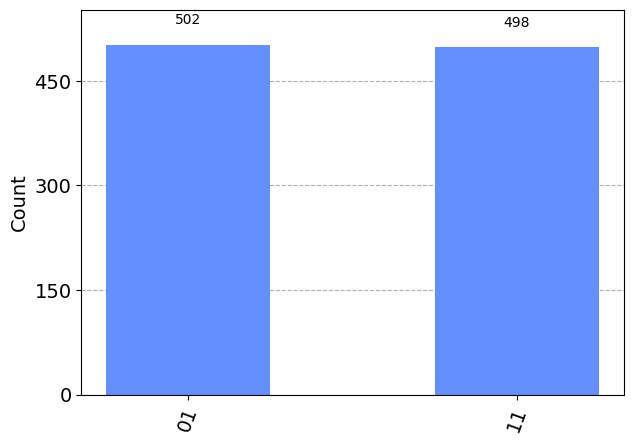

In [115]:
counts = run_measurement(qc_ch, do_transpile = True)
# Plot a histogram
plot_histogram(counts)

## Quantum SWAP Gate

Swaps qubits.

Truth table:

|Input --> Output|

1st|2nd| --> 1st|2nd

|00>   --> |00> 
|01> --> |10>
|10> --> |01> 
|11> --> |11> 

Operator:

       Input: 00 01 10 11

Output:

00 | 1 0 0 0 

01 | 0 0 1 0 

10 | 0 1 0 0

11 | 0 0 0 1

SWAP gate can also be formed using CNOT gates


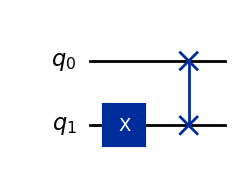

In [116]:
# SWAP Gate on |01> = |10> (|01> in Qiskit Ordering)
qc_sw = QuantumCircuit(2,name="qc")
qc_sw.x(1) # X Gate on 2nd Qubit
qc_sw.swap(0,1) # SWAP Gate Operation
qc_sw.draw(output='mpl')

### Density Plot for SWAP Gate

In [117]:
psi  = run_simulation(qc_sw)
print("\nQuantum state is:")
display(array_to_latex(psi))


Quantum state is:


<IPython.core.display.Latex object>

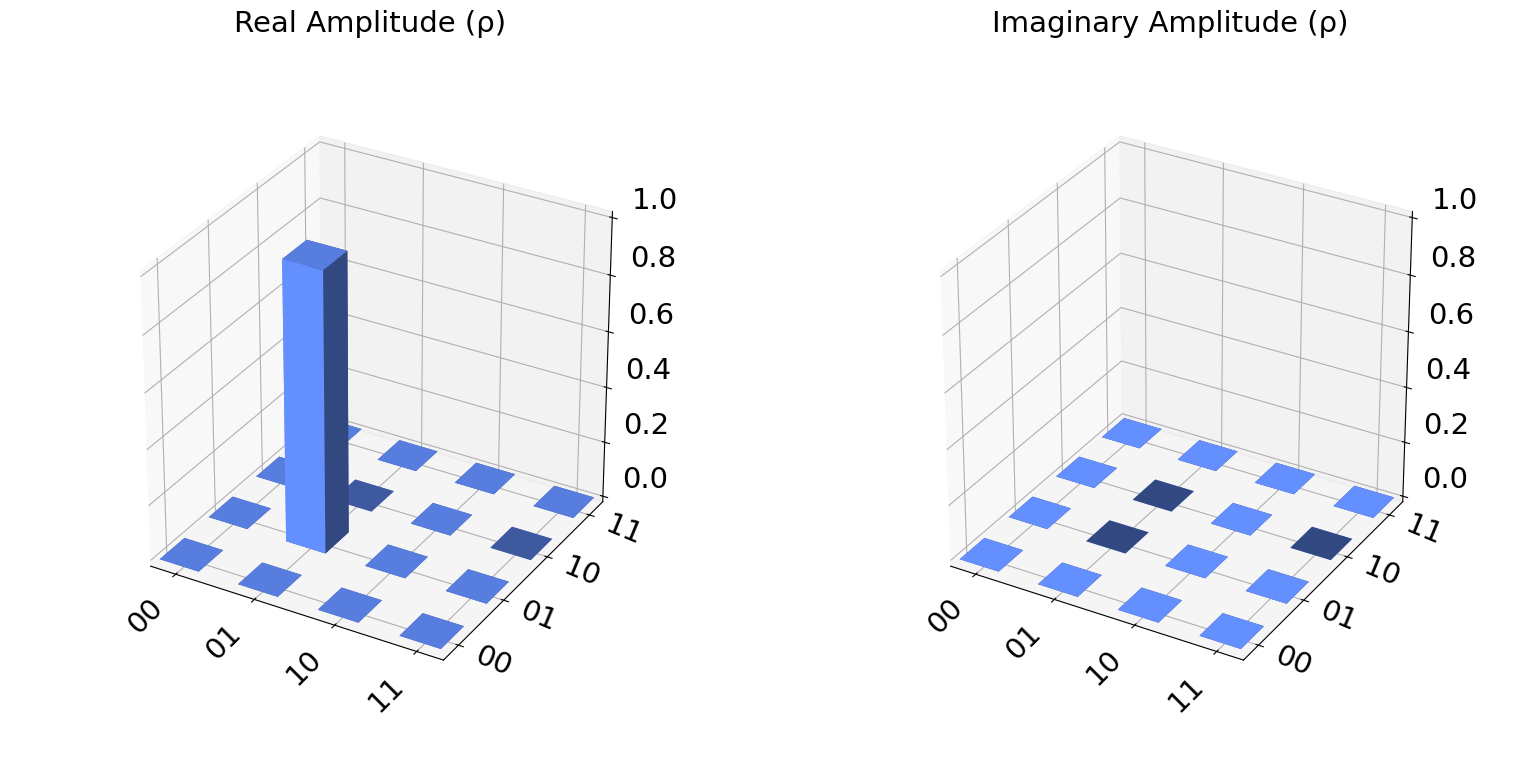

In [118]:
# Plot a Density Matrix Plot
plot_state_city(psi)

### QSphere Plot for SWAP Gate

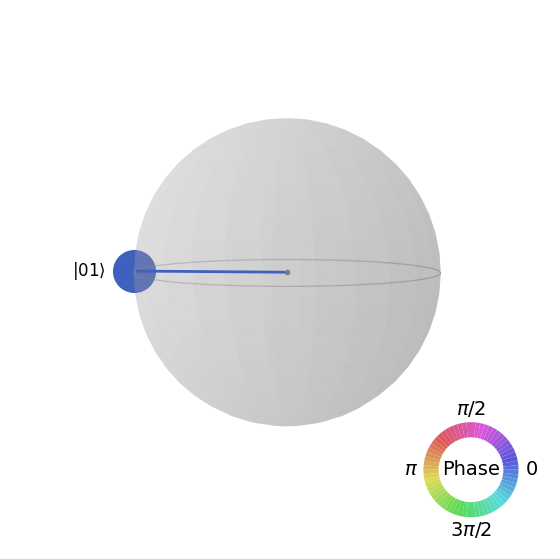

In [119]:
# Plot the QSphere
plot_state_qsphere(psi)

### Unitary Operator for SWAP Gate

In [120]:
show_unitary_operator(qc_sw)

This is the unitary operator for the gate:


<IPython.core.display.Latex object>

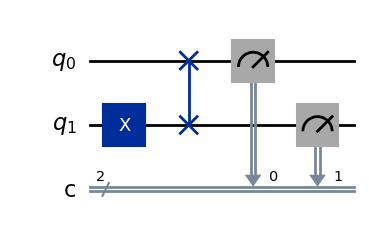

In [121]:
# SWAP Gate on |01> = |10> (|01> in Qiskit Ordering)
qc_sw = QuantumCircuit(2,2,name="qc")
qc_sw.x(1) # X Gate on 2nd Qubit
qc_sw.swap(0,1) # SWAP Gate Operation
qc_sw.measure([0,1],[0,1])
qc_sw.draw(output='mpl')

### Running SWAP Gate Circuit using QASM Simulator


Total counts are: {'01': 1000}


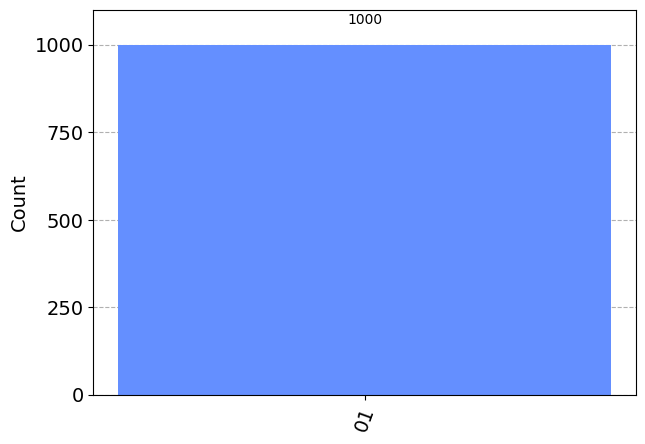

In [125]:
counts = run_measurement(qc_sw)

# Plot a histogram
plot_histogram(counts)

## SWAP Gate using CNOT Gates - 1st Method

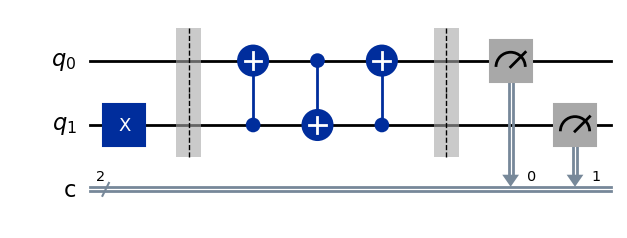

In [126]:
# SWAP Gate using CNOT - 1st Method
qc_sw = QuantumCircuit(2,2,name="qc")
qc_sw.x(1) # X Gate on 2nd Qubit
qc_sw.barrier()
# implement SWAP gate using CNOT
qc_sw.cx(1,0) # CNOT with 1st as target and 2nd as Control
qc_sw.cx(0,1) # CNOT with 1st as Control and 2nd as Target
qc_sw.cx(1,0) # CNOT with 1st as target and 2nd as Control
qc_sw.barrier()
qc_sw.measure([0,1], [0,1])
qc_sw.draw(output='mpl')


Total counts are: {'01': 1000}


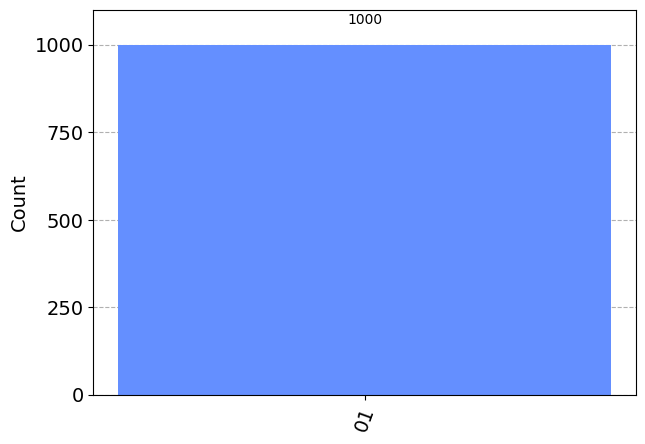

In [129]:
counts = run_measurement(qc_sw)

# Plot a histogram
plot_histogram(counts)

## SWAP Gate using CNOT Gates - 2nd Method

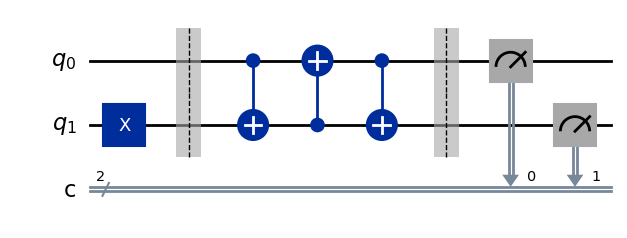

In [130]:
# SWAP Gate using CNOT - 2nd Method
qc_sw = QuantumCircuit(2,2,name="qc")
qc_sw.x(1) # X Gate on 2nd Qubit
qc_sw.barrier()
qc_sw.cx(0,1) # CNOT with 1st as Control and 2nd as Target
qc_sw.cx(1,0) # CNOT with 1st as Target and 2nd as Control
qc_sw.cx(0,1) # CNOT with 1st as Control and 2nd as Target
qc_sw.barrier()
qc_sw.measure([0,1],[0,1])
qc_sw.draw(output='mpl')


Total counts are: {'01': 1000}


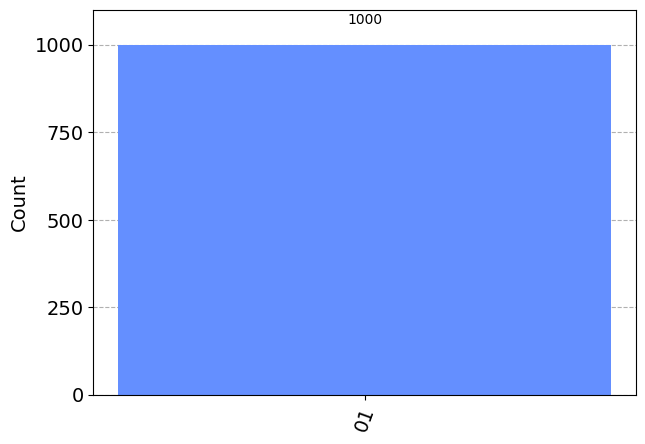

In [131]:
counts = run_measurement(qc_sw)

# Plot a histogram
plot_histogram(counts)

## The Bell State

Bell state generates quantum entanglement.

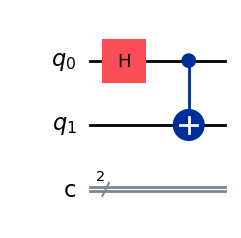

In [133]:
# The Bell State
qc_bell = QuantumCircuit(2,2,name="qc")
qc_bell.h(0) # H Gate on 1st Qubit
qc_bell.cx(0,1) # CNOT with 1st as Control and 2nd as Target
qc_bell.draw(output='mpl')

### Density Matrix Plot for the Bell State


Quantum state is: Statevector([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.707+0.j],
            dims=(2, 2))


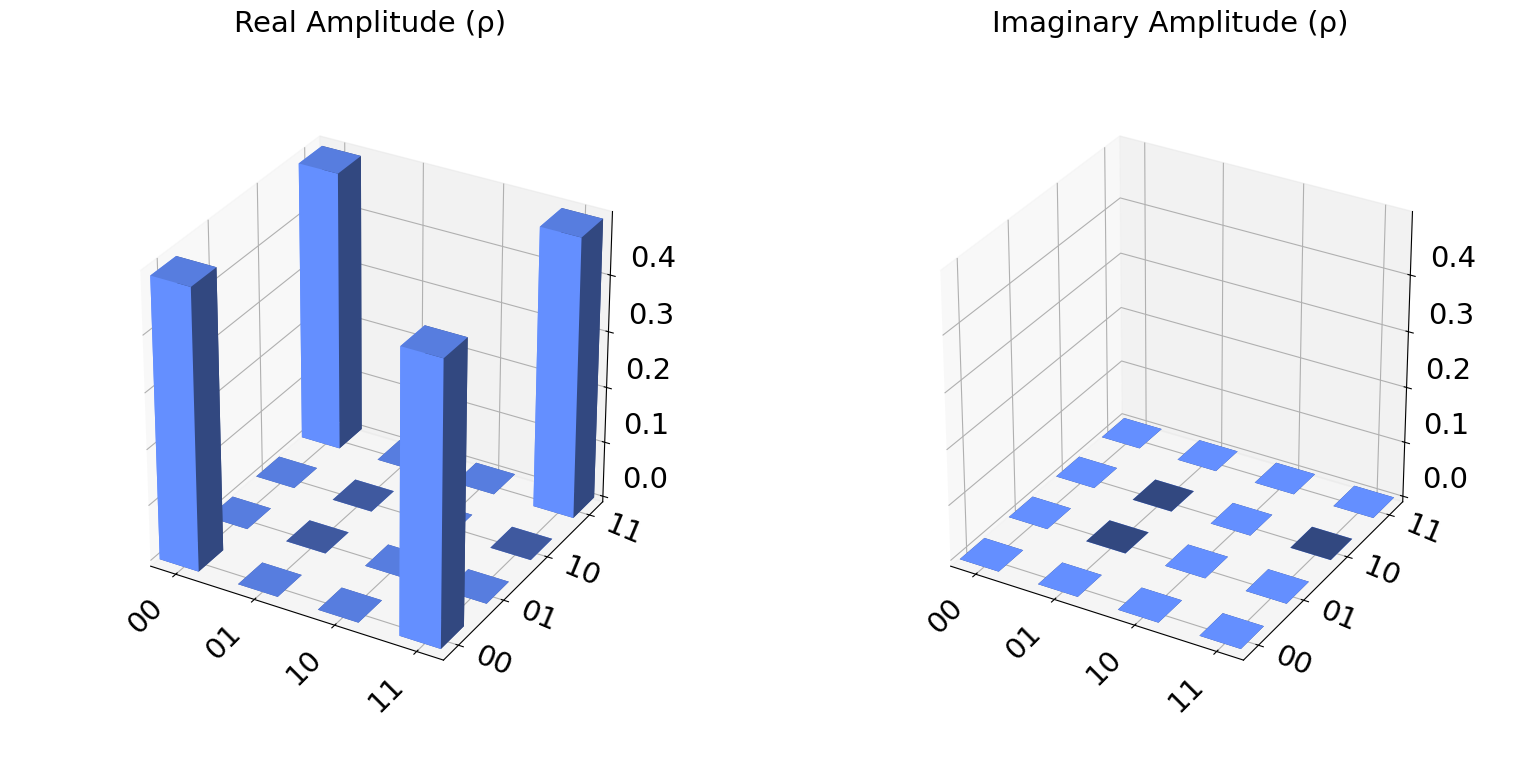

In [134]:
psi  = run_simulation(qc_bell)
print("\nQuantum state is:",psi)

# Plot a Density Matrix Plot
plot_state_city(psi)

### QSphere Plot for the Bell State

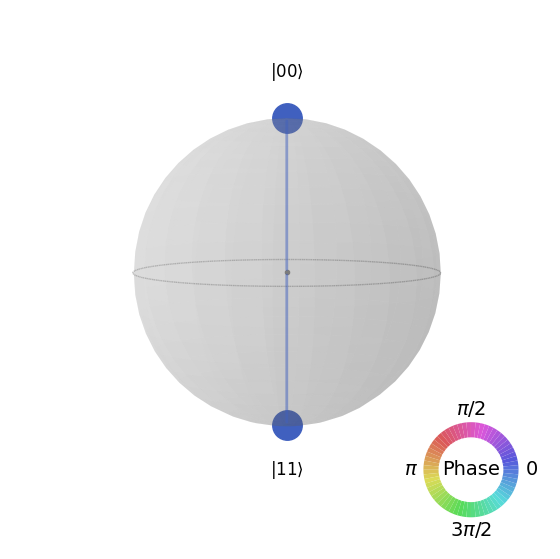

In [135]:
# Plot the QSphere
plot_state_qsphere(psi)

### Unitary Operator for the Bell State

In [138]:
show_unitary_operator(qc_bell)

This is the unitary operator for the gate:


<IPython.core.display.Latex object>

### Running the Bell State Circuit on QASM Simulator

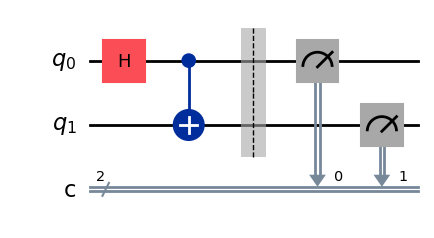

In [139]:
# The Bell State
qc_bell = QuantumCircuit(2,2,name="qc")
qc_bell.h(0) # H Gate on 1st Qubit
qc_bell.cx(0,1) # CNOT with 1st as Control and 2nd as Target
qc_bell.barrier()
qc_bell.measure([0,1],[0,1])
qc_bell.draw(output='mpl')


Total counts are: {'00': 508, '11': 492}

Total counts are: {'00': 508, '11': 492}


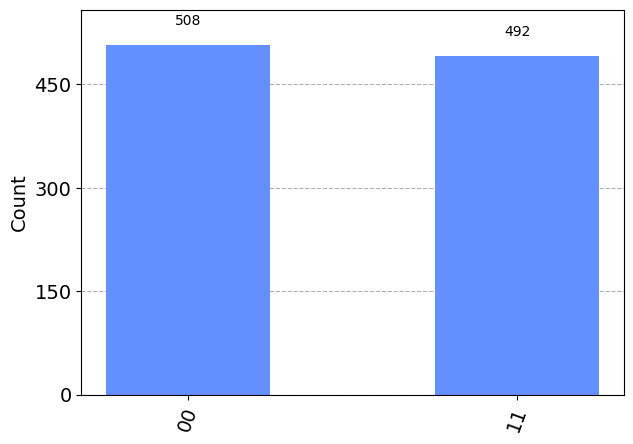

In [140]:
counts = run_measurement(qc_bell)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

## Quantum CCX/CCNOT or Toffoli Gate

Controlled Controlled NOT Gate. Only activated, when both controls are "1"

2^3 x 2^3 = 8x8 matrix 

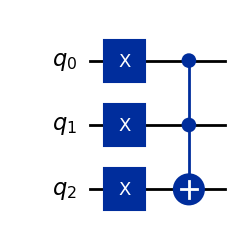

In [141]:
# CCX-gate on |111> = |110> (|011> in Qiskit ordering)
qc_ccx = QuantumCircuit(3,name="qc")
qc_ccx.x(0) # X Gate on 1st Qubit
qc_ccx.x(1) # X Gate on 2nd Qubit
qc_ccx.x(2) # X Gate on 3rd Qubit
qc_ccx.ccx(0,1,2) # CCX Gate with 1st two qubits as control and 3rd as target
qc_ccx.draw(output='mpl')

### Density Matrix Plot for CCX Gate


Quantum state is: Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


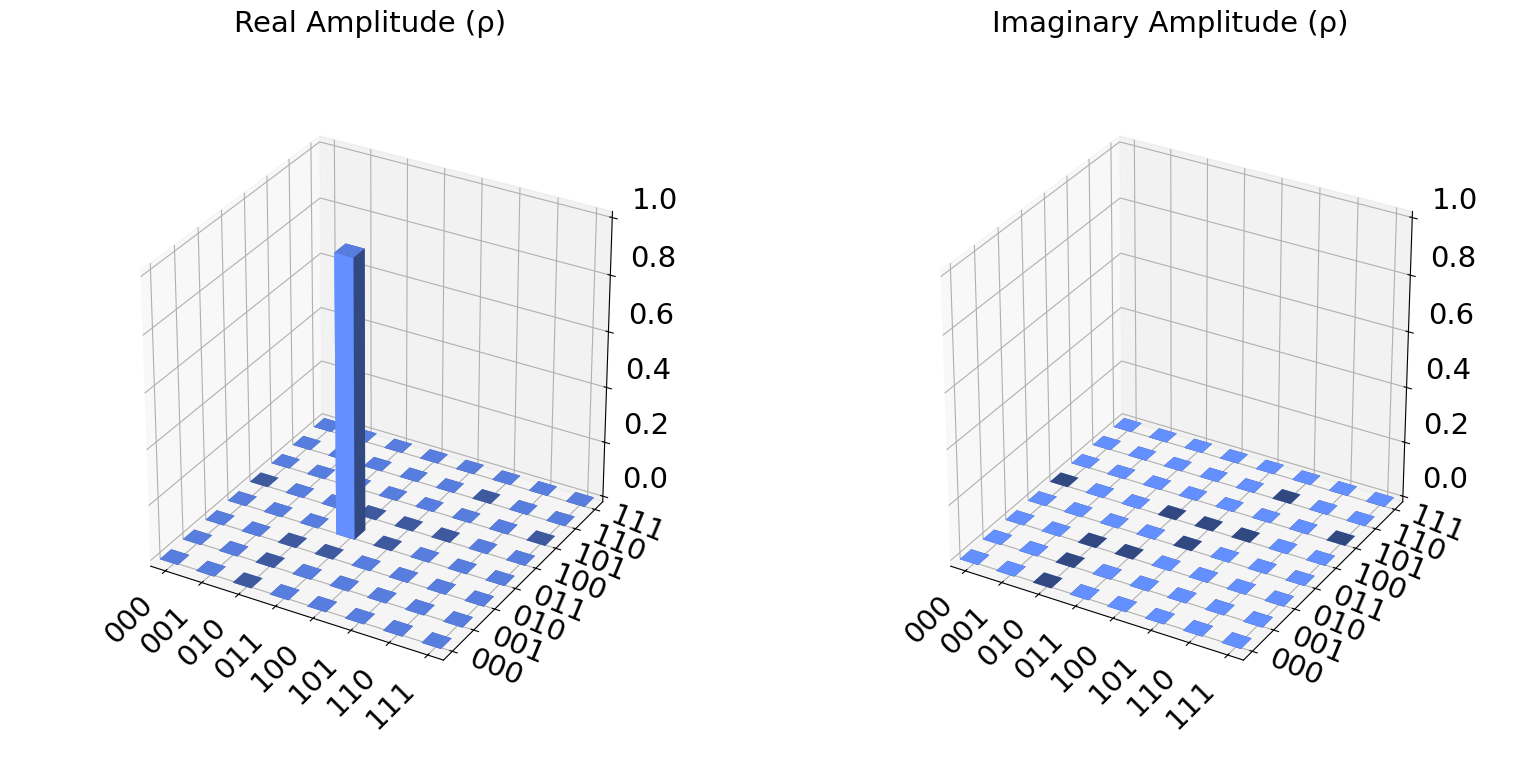

In [144]:
psi  = run_simulation(qc_ccx) #result_state.get_statevector(qc_ccx)
print("\nQuantum state is:",psi)

# Plot a histogram
plot_state_city(psi)

### QSphere Plot for CCX Gate

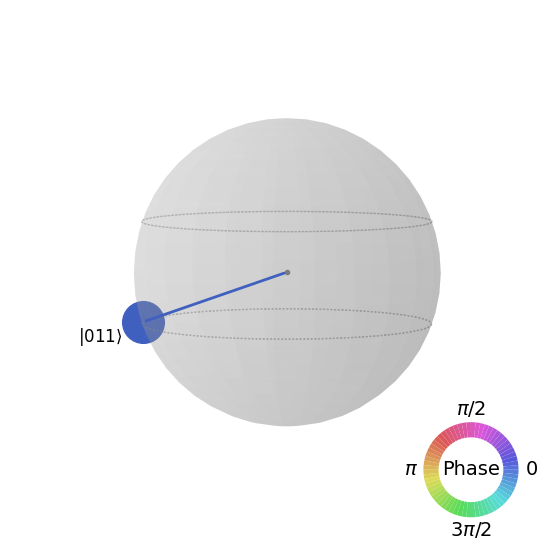

In [145]:
# Plot the QSphere
plot_state_qsphere(psi)

### Unitary Operator for CCX Gate

In [146]:
show_unitary_operator(qc_ccx)

This is the unitary operator for the gate:


<IPython.core.display.Latex object>

### Running the CCX Gate Circuit using QASM Simulator 

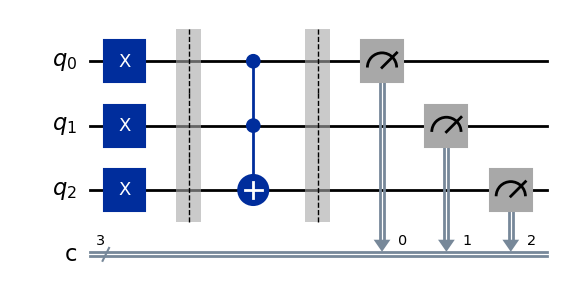

In [147]:
# CCX-gate on |111> = |110> (|011> in Qiskit ordering)
qc_ccx = QuantumCircuit(3,3,name="qc")
qc_ccx.x(0) # X Gate on 1st Qubit
qc_ccx.x(1) # X Gate on 2nd Qubit
qc_ccx.x(2) # X Gate on 3rd Qubit
qc_ccx.barrier()
qc_ccx.ccx(0,1,2) # CCX Gate with 1st two qubits as control and 3rd as target
qc_ccx.barrier()
qc_ccx.measure([0,1,2],[0,1,2])
qc_ccx.draw(output='mpl')


Total counts are: {'011': 1000}


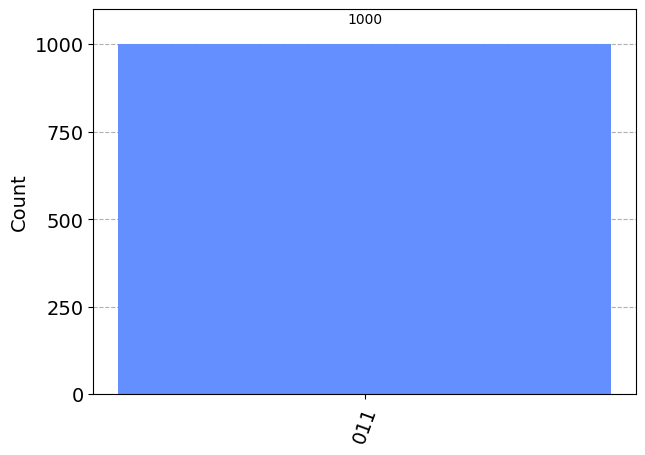

In [149]:
counts = run_measurement(qc_ccx)

# Plot a histogram
plot_histogram(counts)

## Quantum CSWAP Gate or Fredkin Gate

swap only, when control qubit is in state 1 (first qubit). Then the other two qubits are swapped. CAn be constructed with CNOT gates and Toffoli

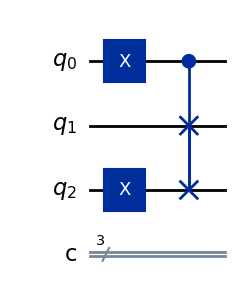

In [150]:
# CSWAP Gate on |101> = |110> (|011> in Qiskit Ordering)
qc_csw = QuantumCircuit(3,3,name="qc")
qc_csw.x(0) # X Gate on 1st Qubit
qc_csw.x(2) # X Gate on 3rd Qubit
qc_csw.cswap(0,1,2) # CSWAP Gate with 1st qubit as control and 2nd & 3rd being swapped
qc_csw.draw(output='mpl')

### Density Matrix Plot for CSWAP Gate


Quantum state is: Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


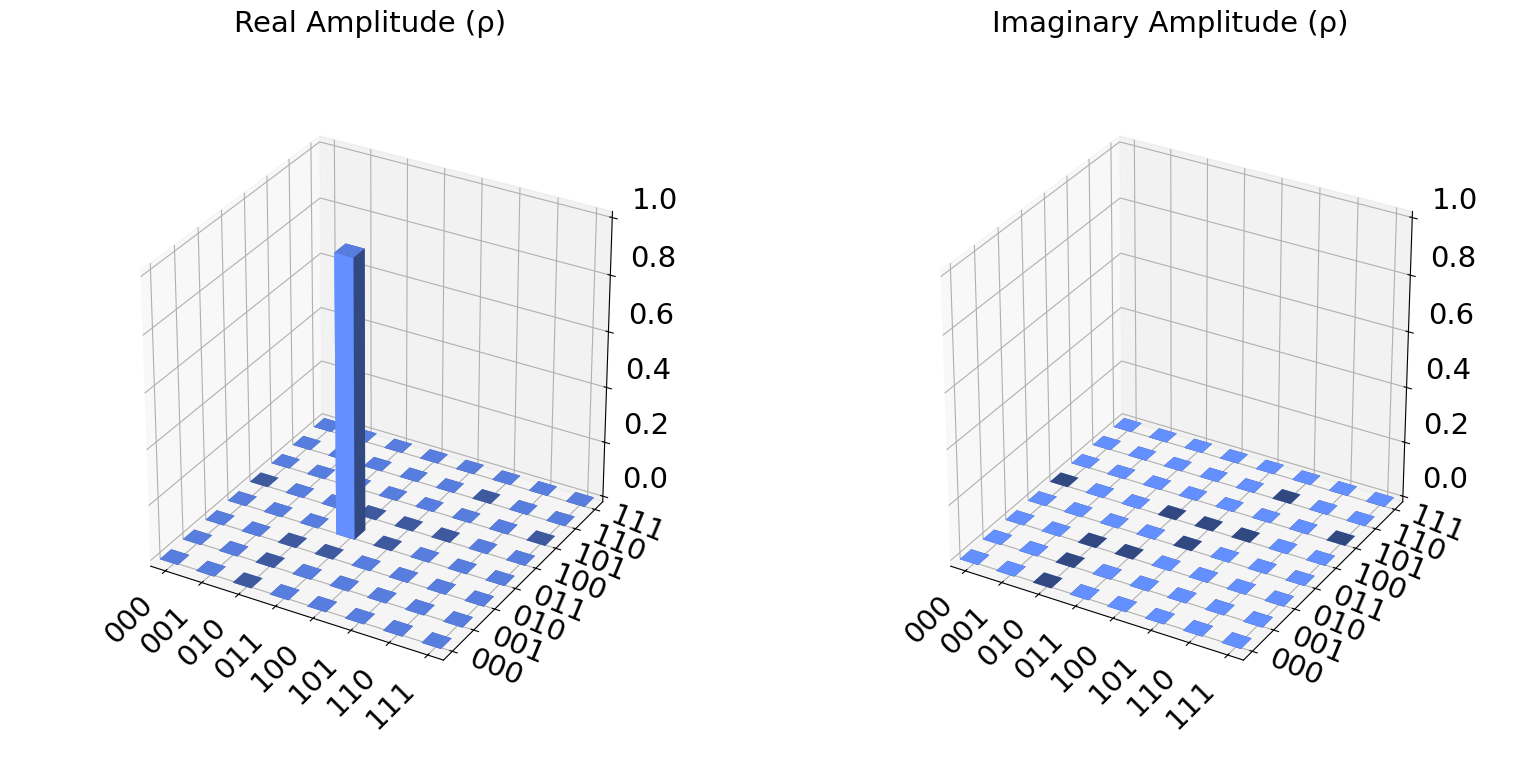

In [151]:
psi  = run_simulation(qc_csw)
print("\nQuantum state is:",psi)

# Plot a histogram
plot_state_city(psi)

### QSphere Plot for CSWAP Gate

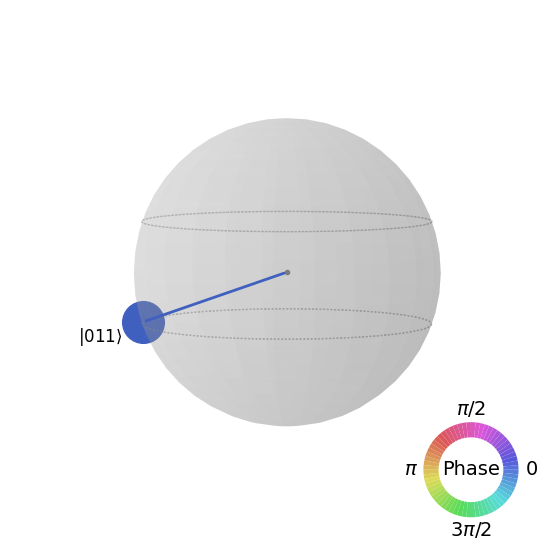

In [152]:
# Plot the QSphere
plot_state_qsphere(psi)

### Unitary Operator for CSWAP Gate

In [153]:
show_unitary_operator(qc_csw)

This is the unitary operator for the gate:


<IPython.core.display.Latex object>

### Running the CSWAP Gate Circuit using QASM Simulator

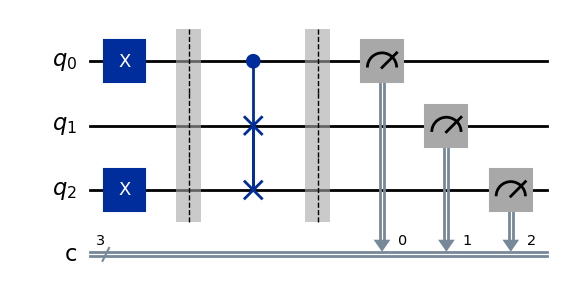

In [154]:
# CSWAP Gate on |101> = |110> (|011> in Qiskit Ordering)
qc_csw = QuantumCircuit(3,3,name="qc")
qc_csw.x(0) # X Gate on 1st Qubit
qc_csw.x(2) # X Gate on 3rd Qubit
qc_csw.barrier()
qc_csw.cswap(0,1,2) # CSWAP Gate with 1st qubit as control and 2nd & 3rd being swapped
qc_csw.barrier()
qc_csw.measure([0,1,2],[0,1,2])
qc_csw.draw(output='mpl')


Total counts are: {'011': 1000}

Total counts are: {'011': 1000}


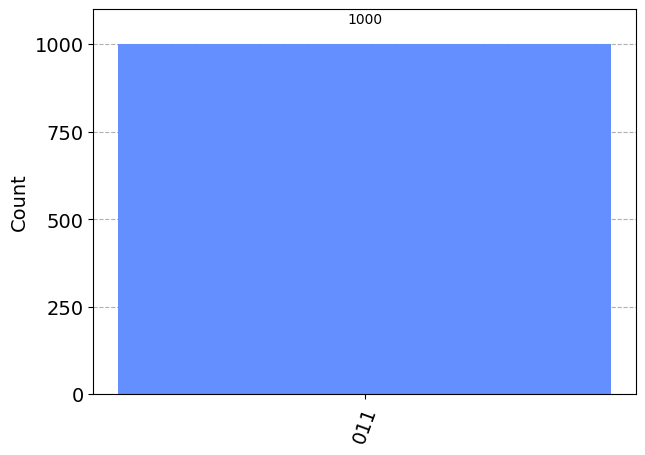

In [155]:
counts = run_measurement(qc_csw)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)